<a href="https://colab.research.google.com/github/WaadAlharthi/ML_Portfolio/blob/main/WaadAlharthi/ML_Module/Clustering_HandsOn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Case Study

**What do the instances that comprise the dataset represent?**

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

**Additional Information**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.

data source : https://archive-beta.ics.uci.edu/ml/datasets/seeds#Descriptive

Charytanowicz, Magorzata, Niewczas, Jerzy, Kulczycki, Piotr, Kowalski, Piotr & Lukasik, Szymon. (2012). seeds. UCI Machine Learning Repository.

# Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

# Ingest Data  

In [101]:
df_original = pd.read_csv("seeds_dataset.txt", delim_whitespace=True, header=None)

df_original.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# EDA

## Implement basic steps to see how is your data looks like

In [102]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [92]:
df_original.describe()

,0,1,2,3,4,5,6,7
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


## Convert columns names and Map Class names

In [103]:
df_original.columns=["area A", "perimeter P", "compactness", "length of kernel", "width of kernel", "asymmetry coefficient", "length of kernel groove", "target" ]

In [104]:
# Convert column names and map class names if necessary
df_original['target'] = df_original['target'].map({1:'Kama', 2:'Rosa',3: 'Canadian'})

In [95]:
df_original.sample(20)

,area A,perimeter P,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,target
98,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,Rosa
69,12.73,13.75,0.8458,5.412,2.882,3.533,5.067,Kama
155,11.19,13.05,0.8253,5.250,2.675,5.813,5.219,Canadian
100,16.41,15.25,0.8866,5.718,3.525,4.217,5.618,Rosa
55,15.03,14.77,0.8658,5.702,3.212,1.933,5.439,Kama
184,12.89,13.77,0.8541,5.495,3.026,6.185,5.316,Canadian
26,13.02,13.76,0.8641,5.395,3.026,3.373,4.825,Kama
32,14.09,14.41,0.8529,5.717,3.186,3.920,5.299,Kama
162,12.05,13.41,0.8416,5.267,2.847,4.988,5.046,Canadian
204,12.37,13.47,0.8567,5.204,2.960,3.919,5.001,Canadian


## Visualy inspect the some features

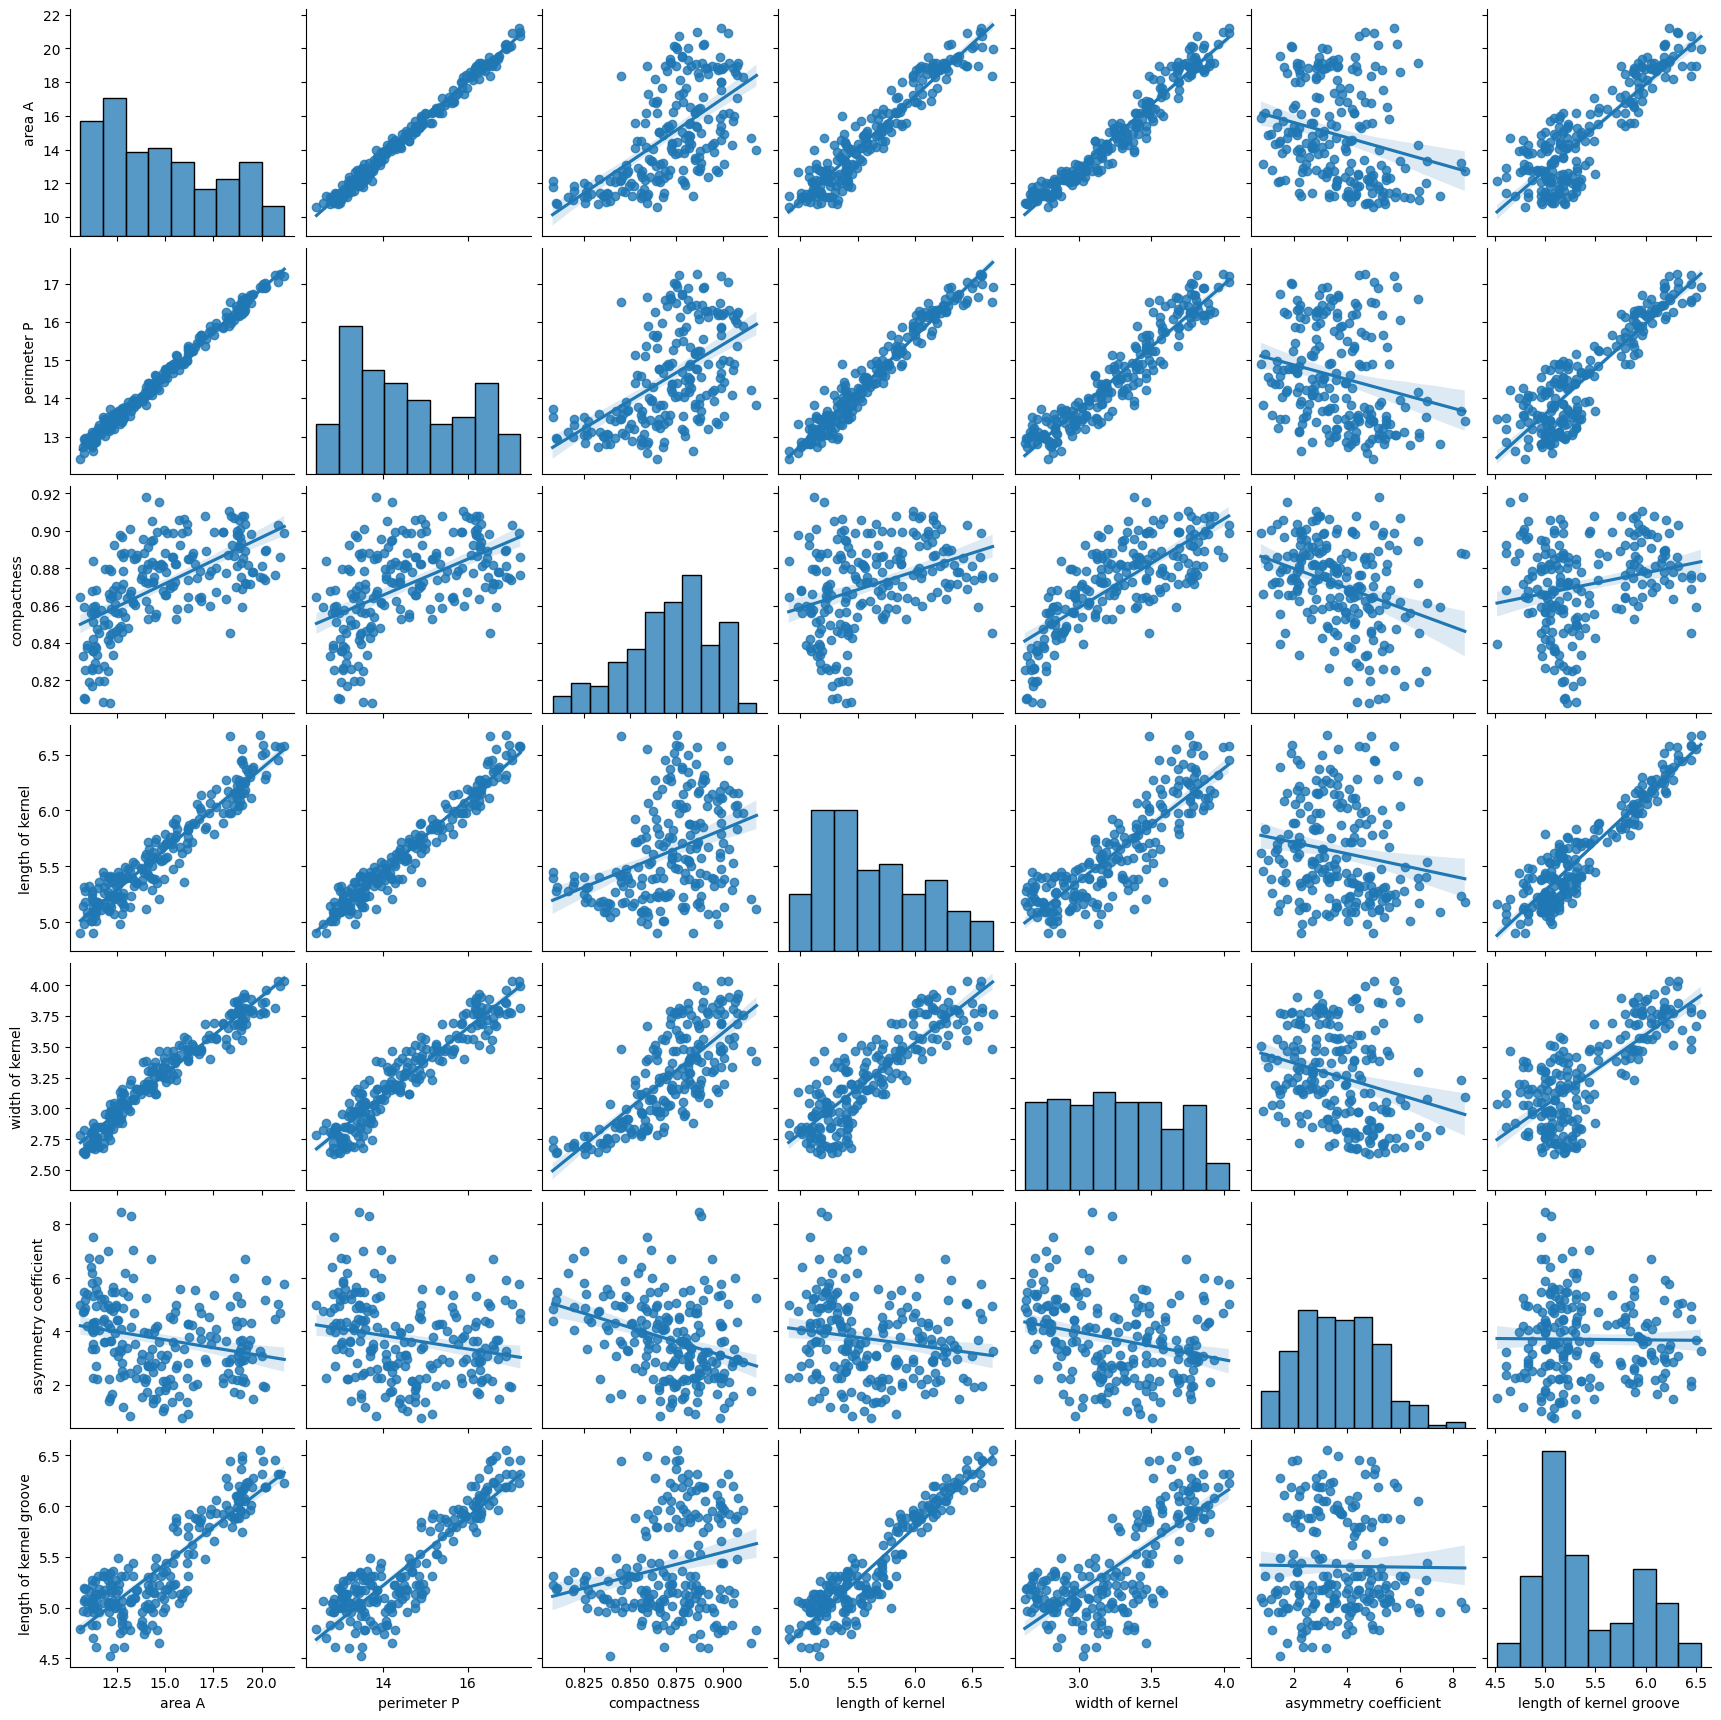

In [54]:
sns.pairplot(df_original, kind="reg")

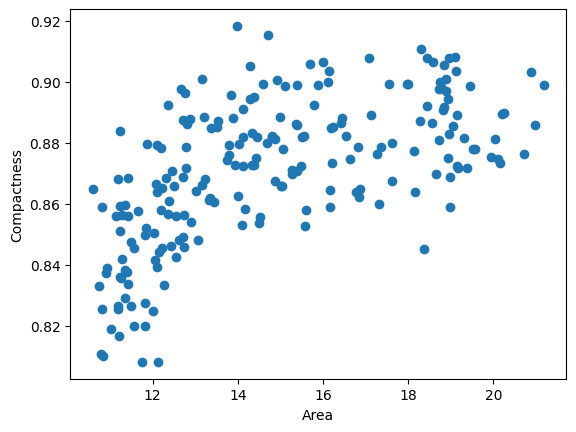

In [56]:
plt.scatter(df_original['area A'], df_original['compactness'])
plt.xlabel('Area')
plt.ylabel('Compactness')
plt.show()

<Axes: >

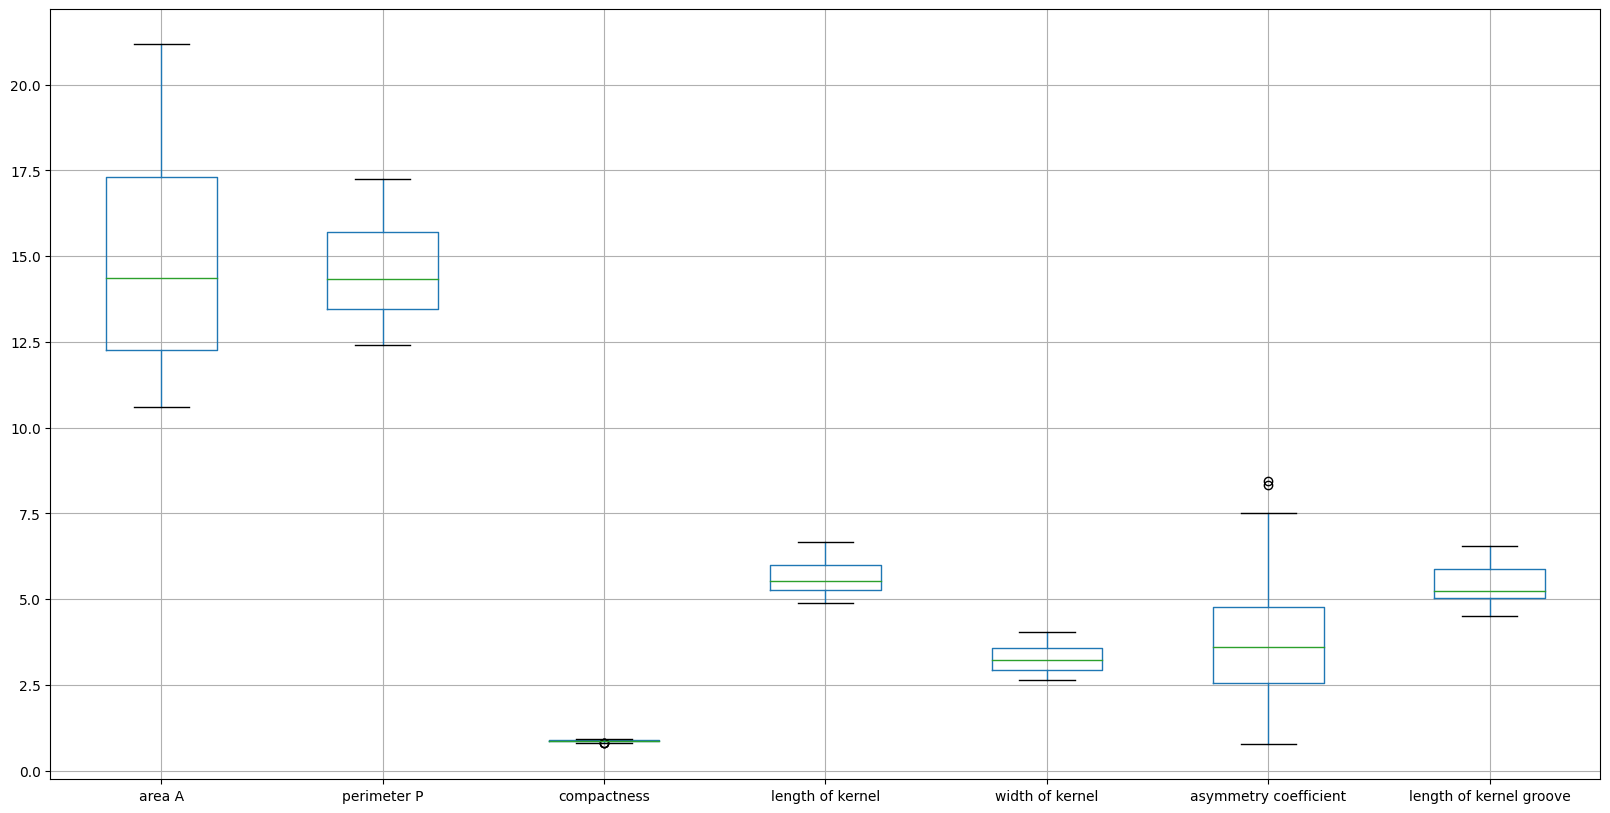

In [57]:
plt.figure(figsize =(20,10))
df_original.boxplot()

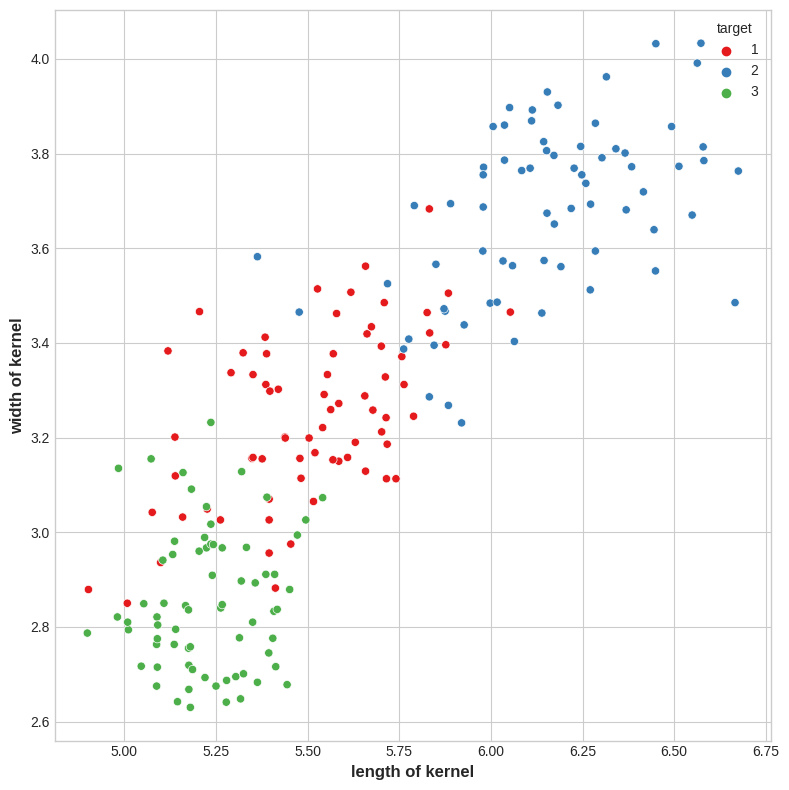

In [154]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (8,8))
sns.scatterplot(x = 'length of kernel', y = 'width of kernel',hue='target',data = df_original,legend='full',palette="Set1")
plt.show()

## Decriptive statistics

# Data Preprocessing

## Drop the features that can't be used in clustering
* Hint:  in clustering projects there are no label

In [106]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area A                   210 non-null    float64
 1   perimeter P              210 non-null    float64
 2   compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
 7   target                   210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.2+ KB


In [108]:
df = df_original.copy()
df.drop(["target"], axis = 1, inplace=True)

In [109]:
from scipy.stats import zscore
data_scaled=df.apply(zscore)

In [110]:
data_scaled

,area A,perimeter P,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356
...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413
206,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156
207,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060
208,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.068135,-0.742535


# Modelling

## Hopkins Test
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [155]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def hopkins_statistic(data, n):
    """
    Calculate the Hopkins statistic for clustering tendency.

    :param data: The input data (numpy array or pandas DataFrame).
    :param n: The number of random data points for comparison.
    :return: The Hopkins statistic.
    """
    random_data = np.random.rand(n, data.shape[1])

    # Calculate the distance to the nearest neighbor in the actual data
    nn_actual = NearestNeighbors(n_neighbors=1).fit(data)
    ujd = nn_actual.kneighbors(data, 2, return_distance=False)[:, 1]

    # Calculate the distance to the nearest neighbor in the random data
    nn_random = NearestNeighbors(n_neighbors=1).fit(random_data)
    wjd = nn_random.kneighbors(data, 1, return_distance=True)[0]

    # Calculate the Hopkins statistic
    hopkins_stat = sum(ujd) / (sum(ujd) + sum(wjd))
    return hopkins_stat

# Usage

hopkins = hopkins_statistic(df_original, n=100)
print("Hopkins Statistic:", hopkins)

hopkins = hopkins_statistic(data_scaled, n=100)
print("Hopkins Statistic:", hopkins)


Hopkins Statistic: [0.83360324]
Hopkins Statistic: [0.97987938]


## Clustering with K-means

### Elbow Method
### We use this method to find optimal k value by looking up to break point of graph.

In [112]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(data_scaled)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

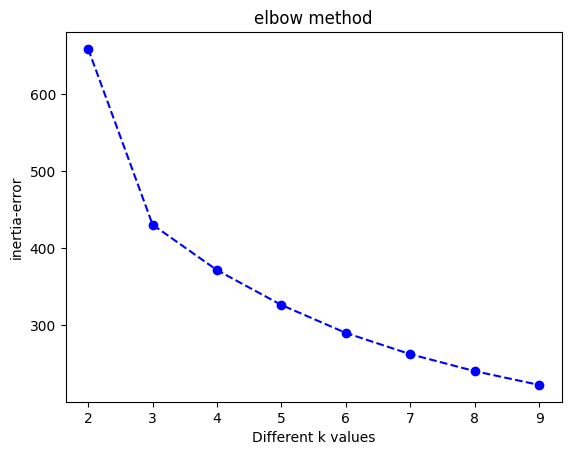

In [113]:
plt.plot(K,ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [114]:
-pd.Series(ssd).diff()

0           NaN
1    228.512781
2     59.077782
3     45.275008
4     36.322057
5     27.634450
6     22.026063
7     17.922814
dtype: float64

### Model Building and label visualisation

In [116]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=0)

In [117]:
df_original['Cluster'] = kmeans.labels_

1:'Kama', 2:'Rosa',3: 'Canadian'

In [119]:
df_original.sample(20)

,area A,perimeter P,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,target,Cluster
13,13.78,14.06,0.8759,5.479,3.156,3.136,4.872,Kama,2
91,18.76,16.20,0.8984,6.172,3.796,3.120,6.053,Rosa,1
87,18.98,16.66,0.8590,6.549,3.670,3.691,6.498,Rosa,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama,2
157,12.13,13.73,0.8081,5.394,2.745,4.825,5.220,Canadian,0
80,16.53,15.34,0.8823,5.875,3.467,5.532,5.880,Rosa,1
189,10.59,12.41,0.8648,4.899,2.787,4.975,4.794,Canadian,0
183,11.65,13.07,0.8575,5.108,2.850,5.209,5.135,Canadian,0
185,11.56,13.31,0.8198,5.363,2.683,4.062,5.182,Canadian,0
201,12.67,13.32,0.8977,4.984,3.135,2.300,4.745,Canadian,2


### Evaluate

In [ ]:
df_original.columns=["area A", "perimeter P", "compactness", "length of kernel", "width of kernel", "asymmetry coefficient", "length of kernel groove", "target" ]

<Axes: xlabel='Cluster', ylabel='length of kernel groove'>

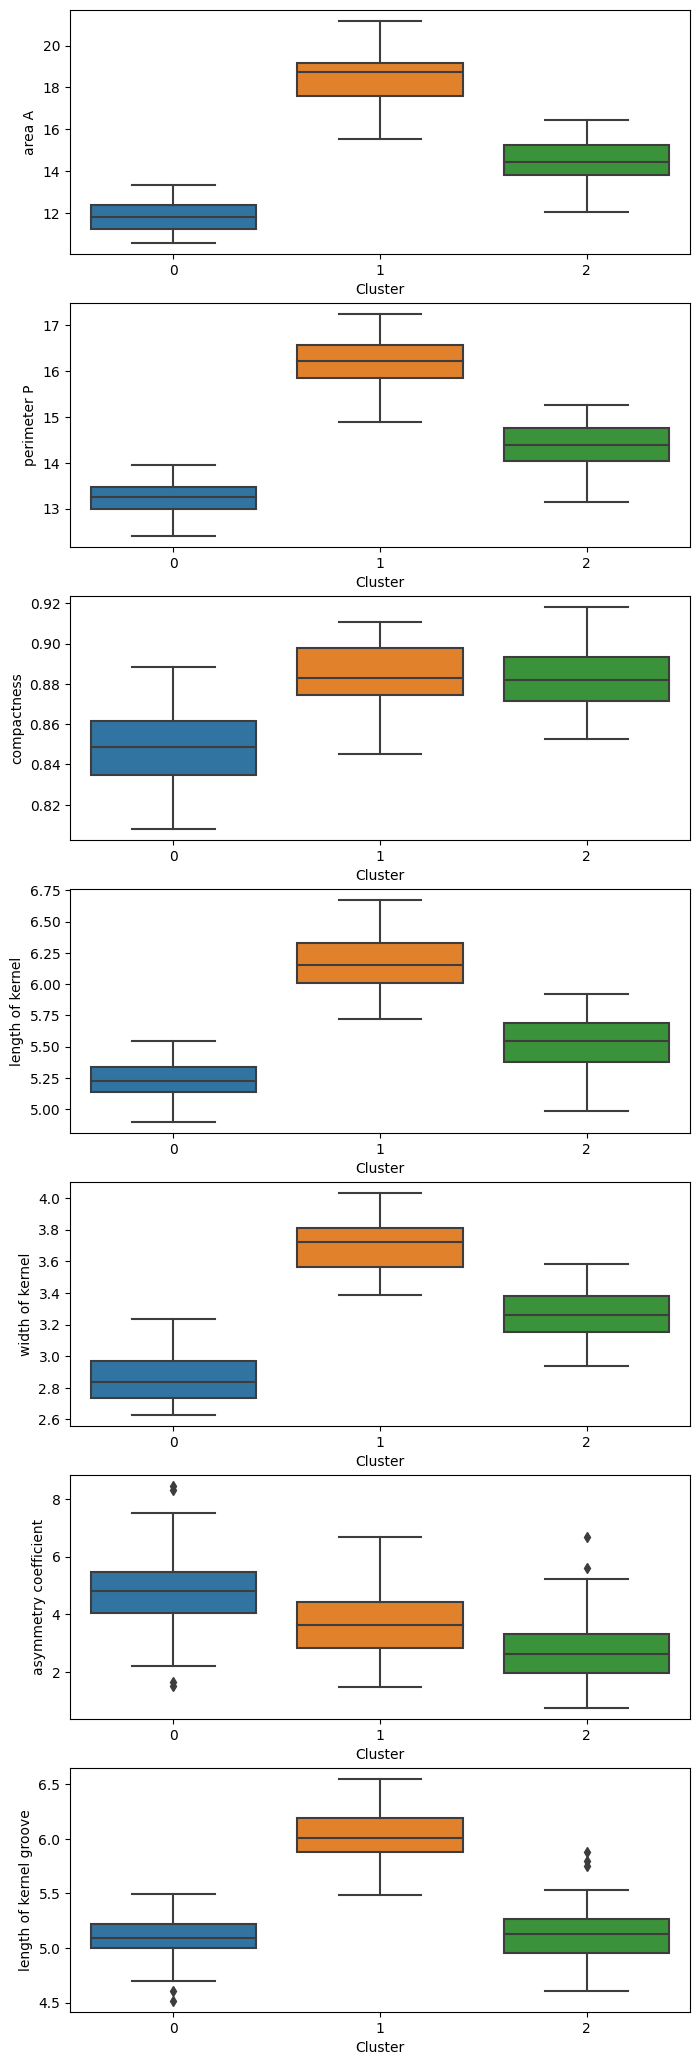

In [131]:
f, axes = plt.subplots(7,figsize = (8,26))
sns.boxplot(x='Cluster',y='area A',  data=df_original ,ax=axes[0])
sns.boxplot(x='Cluster',y='perimeter P', data=df_original ,ax=axes[1])
sns.boxplot(x='Cluster',y='compactness', data=df_original ,ax=axes[2])
sns.boxplot(x='Cluster',y='length of kernel', data=df_original ,ax=axes[3])
sns.boxplot(x='Cluster',y='width of kernel', data=df_original ,ax=axes[4])
sns.boxplot(x='Cluster',y='asymmetry coefficient', data=df_original ,ax=axes[5])
sns.boxplot(x='Cluster',y='length of kernel groove', data=df_original ,ax=axes[6])

In [132]:
df_original['target'] = df_original['target'].map({'Kama':1, 'Rosa':2,'Canadian':3})

In [134]:
df_original['target']

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: target, Length: 210, dtype: int64

<Axes: xlabel='target', ylabel='length of kernel groove'>

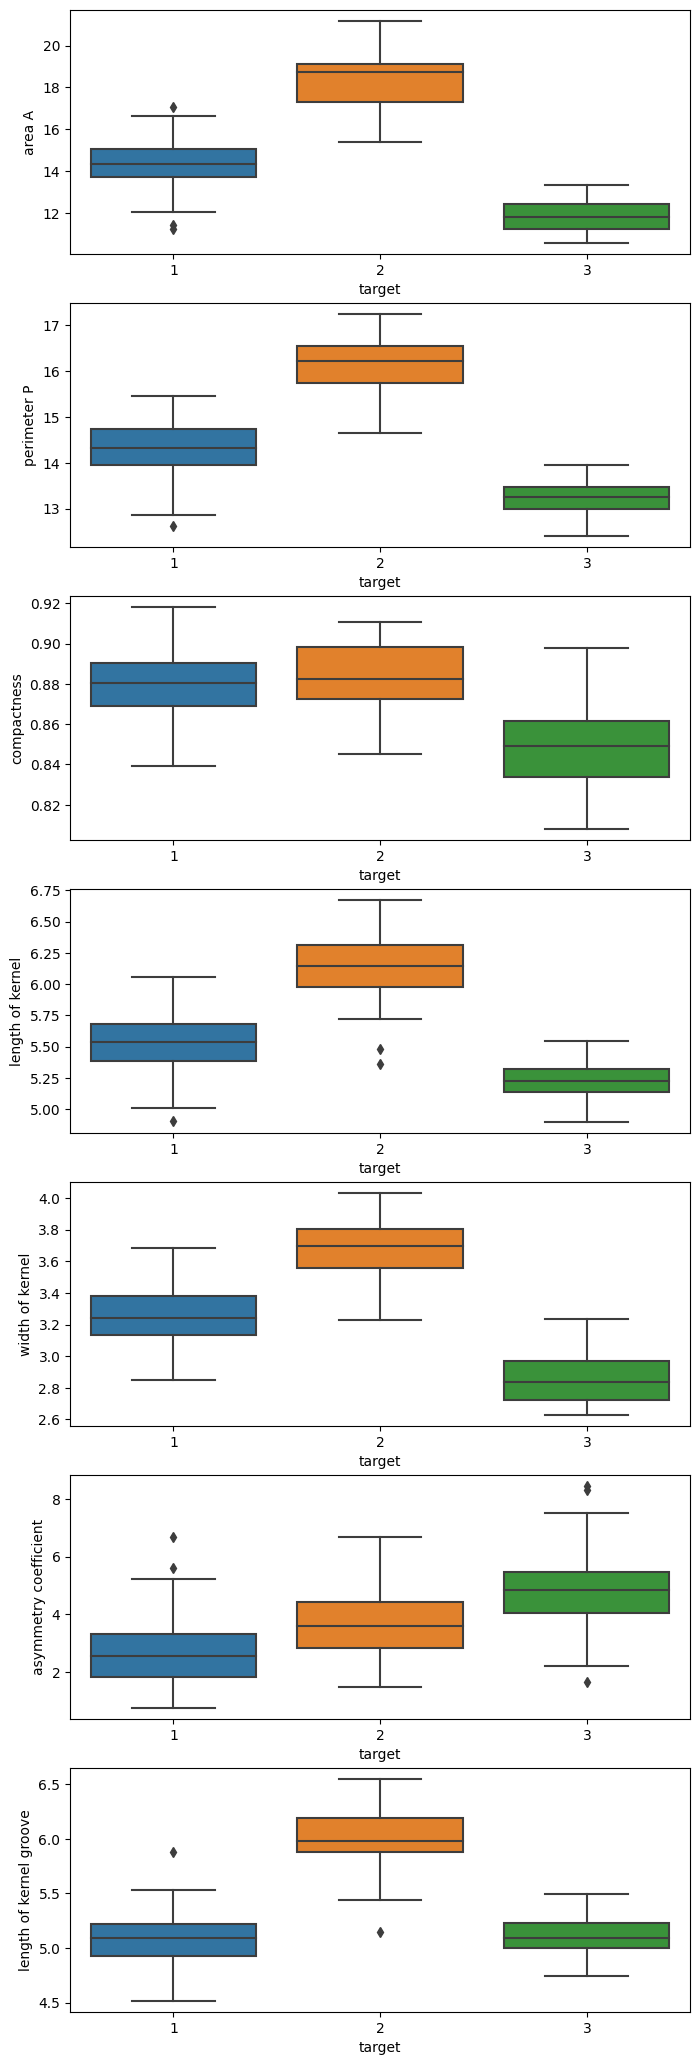

In [135]:
f, axes = plt.subplots(7,figsize = (8,26))
sns.boxplot(x='target',y='area A',  data=df_original ,ax=axes[0])
sns.boxplot(x='target',y='perimeter P', data=df_original ,ax=axes[1])
sns.boxplot(x='target',y='compactness', data=df_original ,ax=axes[2])
sns.boxplot(x='target',y='length of kernel', data=df_original ,ax=axes[3])
sns.boxplot(x='target',y='width of kernel', data=df_original ,ax=axes[4])
sns.boxplot(x='target',y='asymmetry coefficient', data=df_original ,ax=axes[5])
sns.boxplot(x='target',y='length of kernel groove', data=df_original ,ax=axes[6])

lebels reversed

In [151]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# Assuming true_labels are your ground truth labels and kmeans_labels are the K-means cluster assignments
ari = adjusted_rand_score(df_original['target'], df_original['Cluster'])
nmi = normalized_mutual_info_score(df_original['target'], df_original['Cluster'])
silhouette = silhouette_score(df_original, df_original['Cluster'])

print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)
print("Silhouette Score:", silhouette)


Adjusted Rand Index (ARI): 0.7732937360806309
Normalized Mutual Information (NMI): 0.727864144698467
Silhouette Score: 0.5265505334186775


## Hierarchical Clustering

In [136]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [137]:
linkage_matrix = linkage(data_scaled, method='ward')

### Dendogram

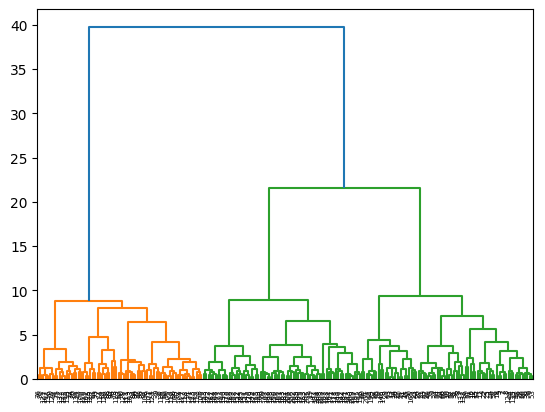

In [138]:
# Create a dendrogram
dendrogram(linkage_matrix)
plt.show()

### Model Building and label visualisation

In [139]:
from sklearn.cluster import AgglomerativeClustering

In [141]:
# Model Building and Label Visualization for Hierarchical Clustering
agglomerative =AgglomerativeClustering(n_clusters=3)
df_original['Cluster_H'] = agglomerative.fit_predict(data_scaled)

In [150]:
df_original.sample(20)

,area A,perimeter P,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,target,Cluster,Cluster_H
200,12.38,13.44,0.8609,5.219,2.989,5.472,5.045,3,0,2
61,11.23,12.63,0.8840,4.902,2.879,2.269,4.703,1,0,0
146,11.43,13.13,0.8335,5.176,2.719,2.221,5.132,3,0,0
201,12.67,13.32,0.8977,4.984,3.135,2.300,4.745,3,2,0
193,10.82,12.83,0.8256,5.180,2.630,4.853,5.089,3,0,2
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1,2,0
171,11.55,13.10,0.8455,5.167,2.845,6.715,4.956,3,0,2
154,11.36,13.05,0.8382,5.175,2.755,4.048,5.263,3,0,2
102,19.46,16.50,0.8985,6.113,3.892,4.308,6.009,2,1,1
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,2,0


### Evaluate

In [153]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# Assuming true_labels are your ground truth labels and kmeans_labels are the K-means cluster assignments
ari = adjusted_rand_score(df_original['target'], df_original['Cluster_H'])
nmi = normalized_mutual_info_score(df_original['target'], df_original['Cluster_H'])
silhouette = silhouette_score(df_original, df_original['Cluster_H'])

print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)
print("Silhouette Score:", silhouette)

Adjusted Rand Index (ARI): 0.796998283593012
Normalized Mutual Information (NMI): 0.7498157518928459
Silhouette Score: 0.5248507188376372


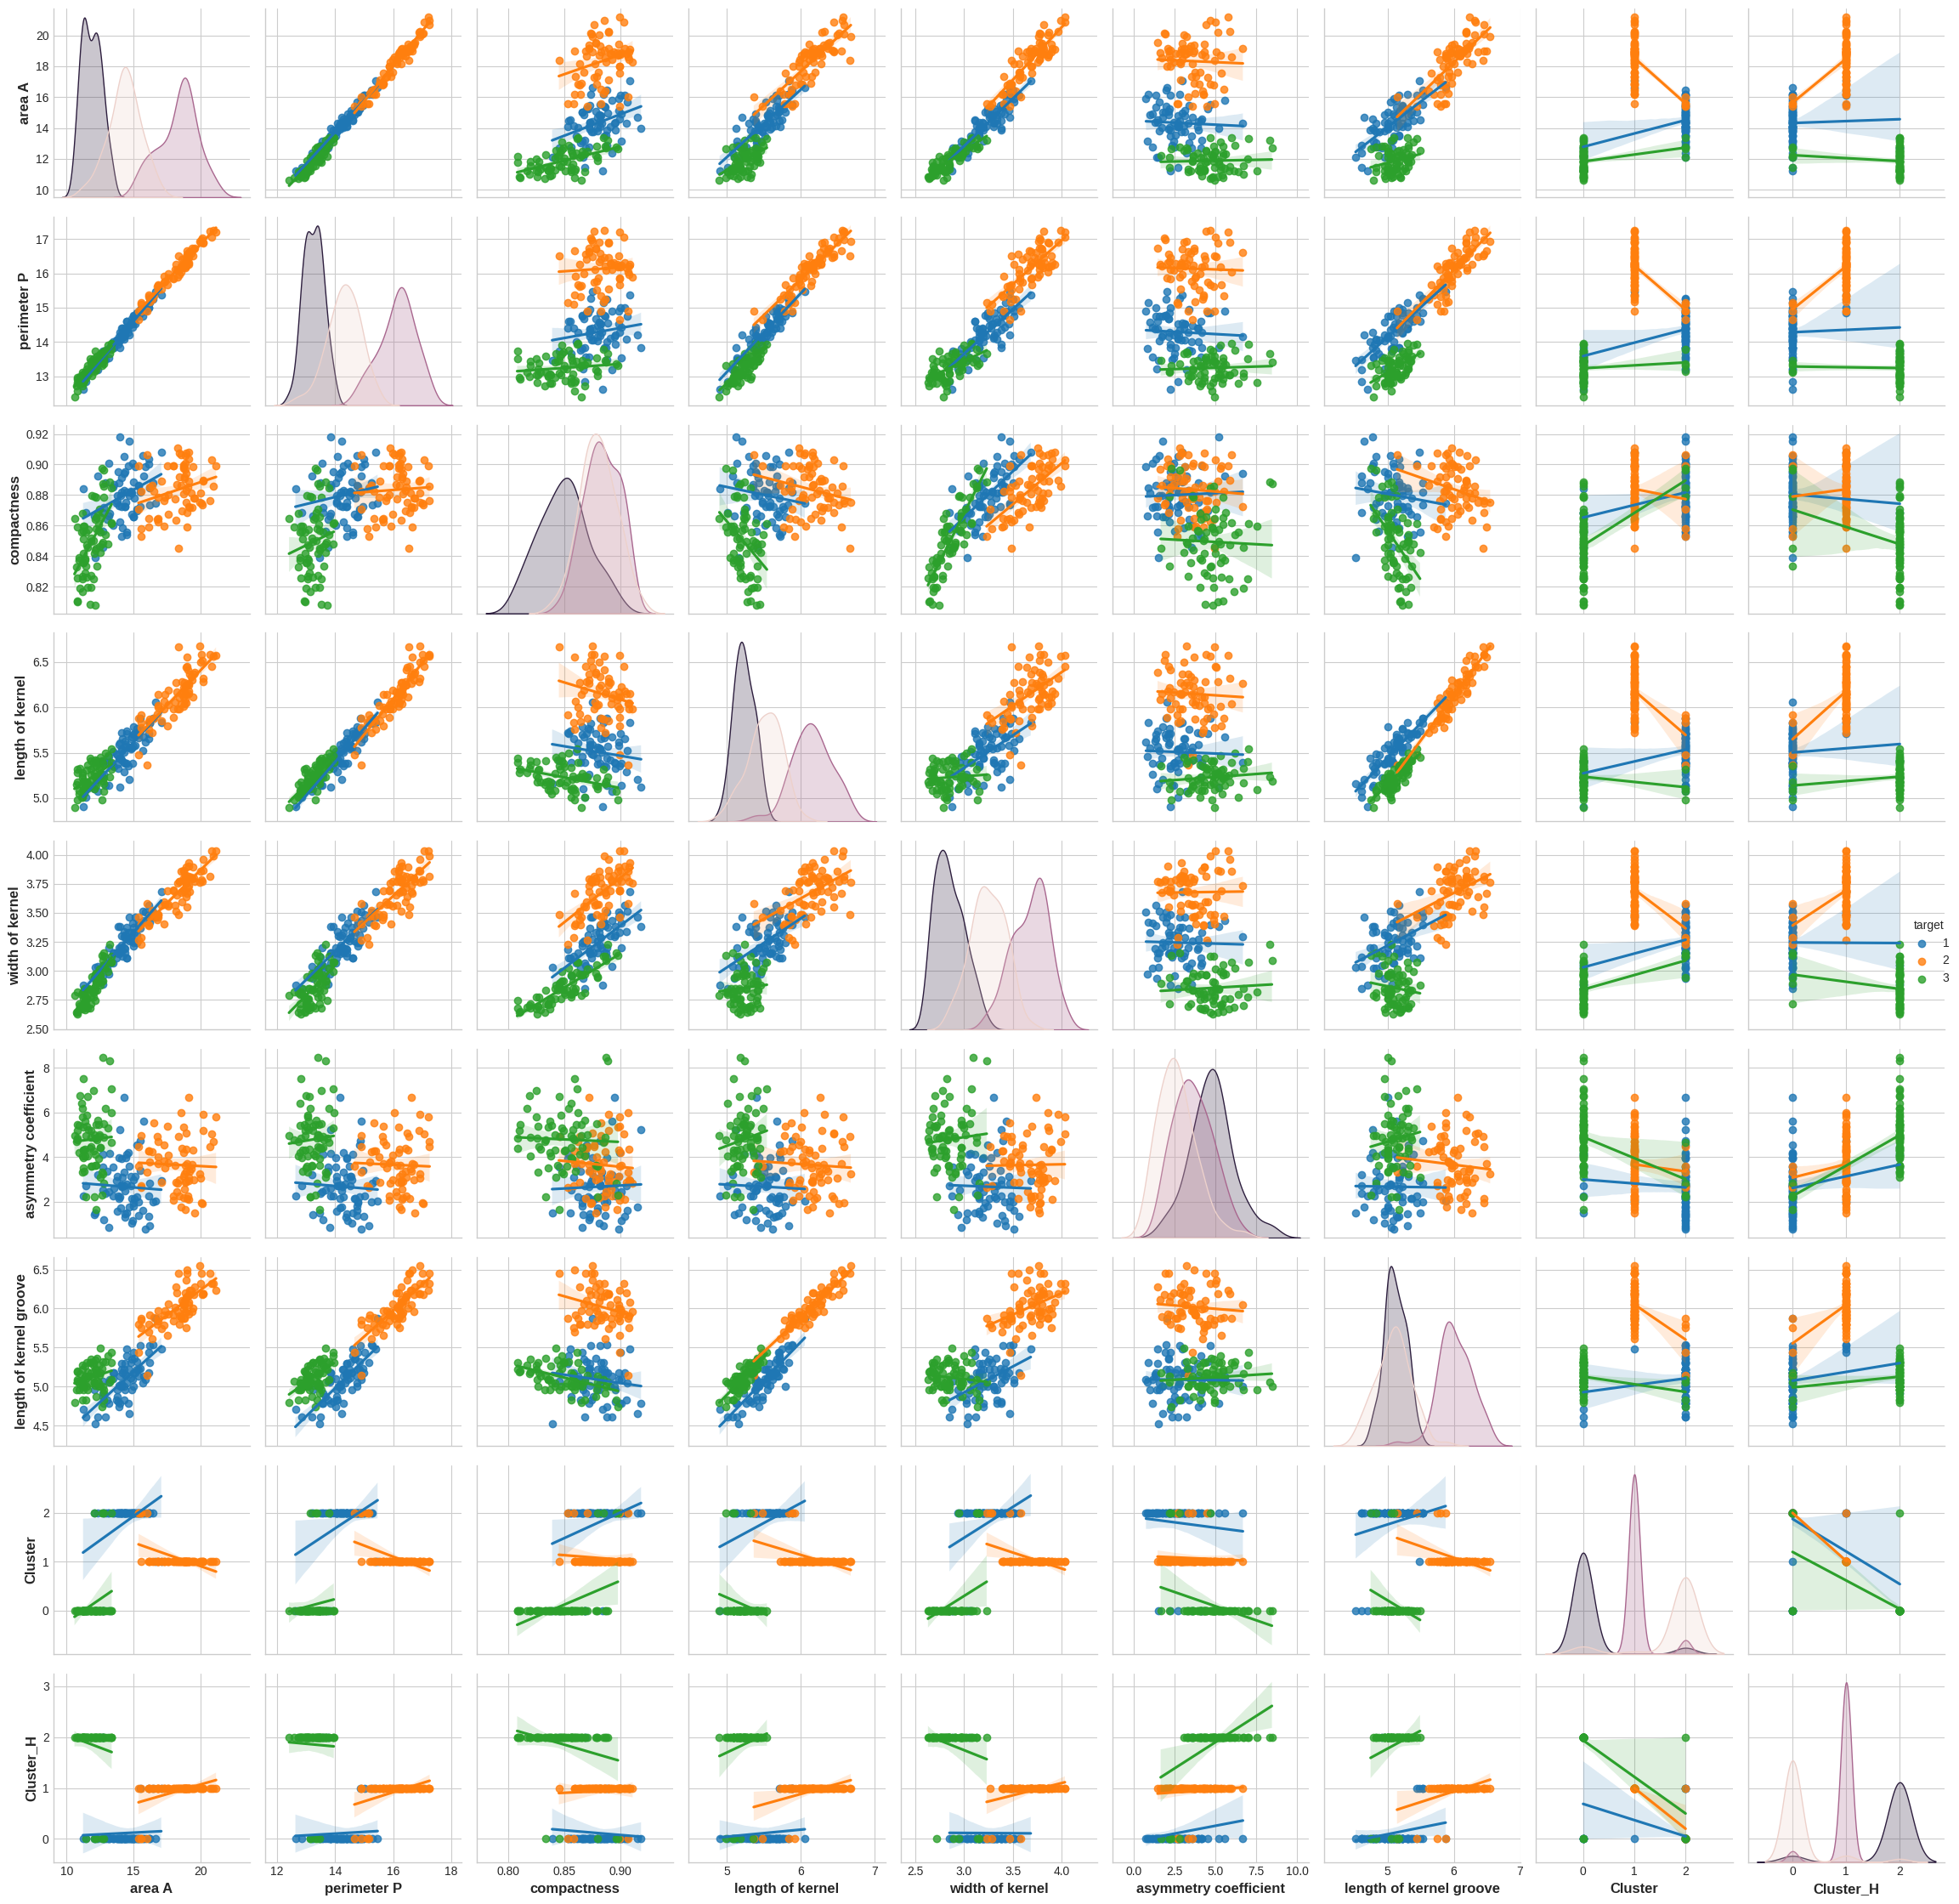

In [157]:
sns.pairplot(df_original, hue='target', kind="reg")

# Feature Engineering (PCA)

In [142]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(data_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.317047,0.783669,-0.631010,0.416846,-0.107496,0.022570,-0.014697
1,-0.003386,1.913214,-0.669754,0.433071,0.044406,0.018921,-0.005479
2,-0.459443,1.907225,0.932489,0.111292,-0.008222,-0.051313,-0.004177
3,-0.591936,1.931069,0.499311,0.228977,0.074853,0.229500,-0.010051
4,1.102910,2.068090,0.056705,0.142421,0.018775,0.052639,-0.000622


In [146]:
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

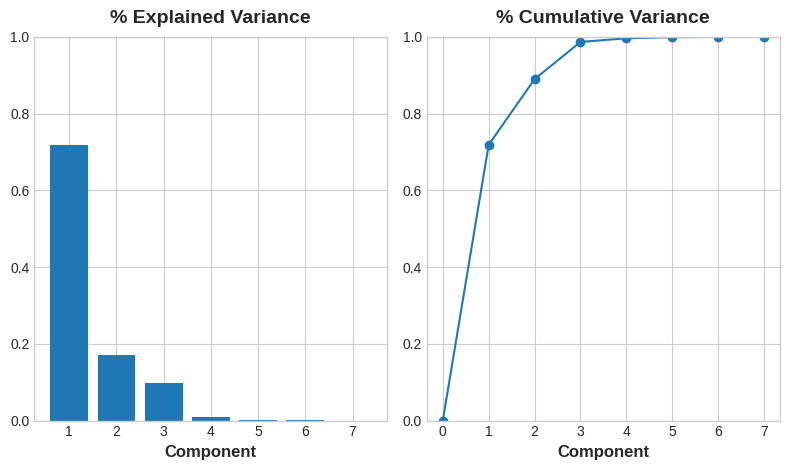

In [148]:
plot_variance(pca)

In [149]:
mi_scores = make_mi_scores(X_pca, df_original.target, discrete_features=False)
mi_scores

PC1    0.825581
PC2    0.255215
PC4    0.128429
PC7    0.123578
PC5    0.088572
PC3    0.000000
PC6    0.000000
Name: MI Scores, dtype: float64

# DBSCAN (optional)
* link : https://scikit-learn.org/stable/modules/clustering.html#dbscan

# GAUSSIAN MIXTURE (Optional)
* link : https://scikit-learn.org/stable/modules/mixture.html